In [1]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

import calendar
import datetime as dt

from datetime import timedelta

from urllib.request import urlopen
import json

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import contextily as ctx
import geojson 

from dash import Dash, html, dcc
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100

From the following blog and video

https://macxima.medium.com/python-how-to-read-multiple-excel-sheets-or-tabs-4d412185c18

https://www.youtube.com/watch?v=fdPV-3K-8pc




In [2]:
#path of the excel file to get all the sheets from the excel file into xls sheet name list
xls = pd.ExcelFile("sales original.xlsx")

#set the file name to read the excel sheets
file_name = "sales original.xlsx"

#For loop to get the sheet name from the excel file
for table_name in xls.sheet_names: 
    
    # Declare a variable to store the different sheet names
    sqlite_table = table_name
    print(sqlite_table)

    # Dynamically create dataframes for each sheet in the excel file.
    vars()[table_name] = pd.DataFrame()

    # Read the excel sheet into a Pandas dataframe
    vars()[table_name] = pd.read_excel(file_name, sheet_name = table_name, index_col=None)
    print(vars()[table_name].head(2))
    
"""    # Create SQL database and for each loop create a new table within the database. 
    conn = sqlite3.connect("sales original.db")
    vars()[table_name].to_sql(sqlite_table, conn, if_exists = 'replace', index=True, index_label = "id_" + sqlite_table[0:4]) # Index = True creates a Primary key called index in the table 
    conn.close()"""

products
         ASIN                                              title product_type
0  B07GWKDLGT  Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....  dslr camera
1  B01MTLH408  Manfrotto Element Aluminum 5-Section Monopod, ...  dslr camera
stock
  StockCode        ASIN
0     21703  B07GWKDLGT
1     40001  B01MTLH408
assessment
   rating  review_count        ASIN
0     4.6          1399  B07GWKDLGT
1     4.6           289  B01MTLH408
invoices
  InvoiceNo        ASIN  Quantity   price  total_sale invoice_date  \
0  78536597  B07GWKDLGT         4  496.95     1987.80   2018-12-01   
1  78536597  B01MTLH408         4   39.99      159.96   2018-12-01   

   invoice_time CustomerID  
0            17      18011  
1            17      18011  
customers
  CustomerID  Country
0      18011  Germany
1      18011  Germany


'    # Create SQL database and for each loop create a new table within the database. \n    conn = sqlite3.connect("sales original.db")\n    vars()[table_name].to_sql(sqlite_table, conn, if_exists = \'replace\', index=True, index_label = "id_" + sqlite_table[0:4]) # Index = True creates a Primary key called index in the table \n    conn.close()'

In [3]:
# del merged_tables

In [4]:
# Concact the useful columns for further analysis. 
# This means take the following df's and add columns to make a super DF. From: invoices


merged_tables = pd.concat([invoices, products, customers, assessment, stock], axis=1)



In [5]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554417 entries, 0 to 554416
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     554417 non-null  object        
 1   ASIN          554417 non-null  object        
 2   Quantity      554417 non-null  int64         
 3   price         554417 non-null  float64       
 4   total_sale    554417 non-null  float64       
 5   invoice_date  554417 non-null  datetime64[ns]
 6   invoice_time  554417 non-null  int64         
 7   CustomerID    554417 non-null  object        
 8   ASIN          554417 non-null  object        
 9   title         554417 non-null  object        
 10  product_type  554417 non-null  object        
 11  CustomerID    554417 non-null  object        
 12  Country       554417 non-null  object        
 13  rating        554417 non-null  float64       
 14  review_count  554417 non-null  int64         
 15  ASIN          554

In [6]:
# merged_tables.to_csv('merged_ecommerce.csv')


In [7]:
# merged_tables = pd.read_csv('merged_ecommerce.csv')  

In [8]:
display(merged_tables.columns)
display(merged_tables.columns.duplicated())
display(merged_tables.head())


Index(['InvoiceNo', 'ASIN', 'Quantity', 'price', 'total_sale', 'invoice_date',
       'invoice_time', 'CustomerID', 'ASIN', 'title', 'product_type',
       'CustomerID', 'Country', 'rating', 'review_count', 'ASIN', 'StockCode',
       'ASIN'],
      dtype='object')

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False,  True])

,InvoiceNo,ASIN,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID,ASIN,title,product_type,CustomerID,Country,rating,review_count,ASIN,StockCode,ASIN
0,78536597,B07GWKDLGT,4,496.95,1987.80,2018-12-01,17,18011,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,18011,Germany,4.6,1399,B07GWKDLGT,21703,B07GWKDLGT
1,78536597,B01MTLH408,4,39.99,159.96,2018-12-01,17,18011,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,18011,Germany,4.6,289,B01MTLH408,40001,B01MTLH408
2,78536597,B0064FS7HI,1,12.99,12.99,2018-12-01,17,18011,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,18011,Germany,4.4,333,B0064FS7HI,85034A,B0064FS7HI
3,78536597,B013JHU5YG,1,199.99,199.99,2018-12-01,17,18011,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,18011,Germany,4.3,86,B013JHU5YG,72798C,B013JHU5YG
4,78536597,B06XWN9Q99,1,7.49,7.49,2018-12-01,17,18011,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,18011,Germany,4.7,15717,B06XWN9Q99,20726,B06XWN9Q99


In [66]:
# To check the corresponding iloc values of all the columns for easy reference.

merged_tables.info()
merged_tables.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554417 entries, 0 to 554416
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     554417 non-null  object        
 1   Product_Id    554417 non-null  object        
 2   Quantity      554417 non-null  int64         
 3   Price         554417 non-null  float64       
 4   Total_Sales   554417 non-null  float64       
 5   Customer_Id   554417 non-null  object        
 6   Product_Name  554417 non-null  object        
 7   Product_Type  554417 non-null  object        
 8   Country       554417 non-null  object        
 9   Rating        554417 non-null  float64       
 10  Review_Count  554417 non-null  int64         
 11  StockCode     554417 non-null  object        
 12  Hour          554417 non-null  int64         
 13  Day           554417 non-null  object        
 14  Month         554417 non-null  object        
 15  Year          554

(554417, 18)

In [10]:
# Manually checking if all the values in each row of duplicate columns are same. For instance there are 4 ASIN columns in the 
# merged table so it is important to see if all the values in each row are equal. If any values in two columns that is compared is different then "False" is returned. If not "True"

merged_tables.iloc[ : , 8].equals(merged_tables.iloc[ : , 15])

True

In [11]:
# Deleting unneccesary columns after checking if the column values are equal from the above step. This code deletes duplicate columns based on the column name.

merged_tables = merged_tables.loc[ : , ~merged_tables.columns.duplicated()].copy()


In [12]:
# Rename columns for better user readability using df.rename()

merged_tables.rename(columns={'price': 'Price', 'total_sale': 'Total_Sales', 'CustomerID' : 'Customer_Id',
'title' : 'Product_Name', 'product_type' : 'Product_Type', 'rating' : 'Rating', 'review_count' : 'Review_Count', 'ASIN':'Product_Id'}, inplace=True)

In [13]:
# Create a single date time column with the correct dtype and using the combination of values from the original invoice_date and invoice_time

merged_tables["Invoice_DateTime"] = merged_tables["invoice_date"] + merged_tables["invoice_time"].astype("timedelta64[h]")

# Drop the invoice_date and invoice_time from the table since we've created a new column with the combined date and time columns.

merged_tables = merged_tables.drop(["invoice_date", "invoice_time"], axis = 1).copy()





In [14]:
merged_tables.head(2)

,InvoiceNo,Product_Id,Quantity,Price,Total_Sales,Customer_Id,Product_Name,Product_Type,Country,Rating,Review_Count,StockCode,Invoice_DateTime
0,78536597,B07GWKDLGT,4,496.95,1987.80,18011,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,Germany,4.6,1399,21703,2018-12-01 17:00:00
1,78536597,B01MTLH408,4,39.99,159.96,18011,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,Germany,4.6,289,40001,2018-12-01 17:00:00


In [15]:
# Seperate the Invoice_DateTime coloumn to individal segments.
merged_tables['Hour'] = merged_tables['Invoice_DateTime'].dt.hour
merged_tables['Day_Number'] = merged_tables['Invoice_DateTime'].dt.dayofweek.astype(str)
merged_tables['Day_Number']= merged_tables['Day_Number'].str.rjust(2, "0")
merged_tables["Day_Name"] = merged_tables["Invoice_DateTime"].dt.day_name()
merged_tables["Day"] = merged_tables["Day_Number"].astype(str) + " " + merged_tables["Day_Name"].astype(str) 
merged_tables['Month_Number'] = merged_tables['Invoice_DateTime'].dt.month.astype(str)
merged_tables['Month_Number']= merged_tables['Month_Number'].str.rjust(2, "0")
merged_tables['Month_name'] = merged_tables['Invoice_DateTime'].dt.month_name()
merged_tables["Month"] = merged_tables["Month_Number"].astype(str) + " " + merged_tables["Month_name"].astype(str) 
merged_tables['Year'] = merged_tables['Invoice_DateTime'].dt.year
merged_tables['Quarter'] = merged_tables['Invoice_DateTime'].dt.quarter
merged_tables['Invoice_Date'] = merged_tables['Invoice_DateTime'].dt.date.astype("datetime64[ns]")

# list(calendar.day_abbr)

In [16]:


merged_tables = merged_tables.drop(["Day_Number", "Day_Name",'Month_Number', 'Month_name', "Invoice_DateTime"], axis = 1).copy()



In [17]:
# Display all the unique values in product type, countries, customer id, product name and ASIN key. 
# the unique number of ASIN should be equal to unique number of Product names
display("Unique number of Product_Type: " + str(merged_tables.Product_Type.nunique()))
display("Unique number of Country: " + str(merged_tables.Country.nunique()))
display("Unique number of Customer_Id: " + str(merged_tables.Customer_Id.nunique()))
display("Unique number of Product_Name: " + str(merged_tables.Product_Name.nunique()))
display("Unique number of ASIN: " + str(merged_tables.Product_Id.nunique()))
display("Unique invoices: " + str(merged_tables.InvoiceNo.nunique()))

# display(merged_tables[merged_tables['Year'] == 2018].groupby(['InvoiceNo']).agg({'InvoiceNo':['nunique']}))
# display(merged_tables[merged_tables['Year'] == 2019].groupby(['InvoiceNo']).agg({'InvoiceNo':['nunique']}))
# display(merged_tables[merged_tables['Country'] == "Lithuania"].groupby(['InvoiceNo']).agg({'InvoiceNo':['nunique']}))




'Unique number of Product_Type: 6'

'Unique number of Country: 37'

'Unique number of Customer_Id: 4340'

'Unique number of Product_Name: 4188'

'Unique number of ASIN: 4134'

'Unique invoices: 20534'

In [18]:
display(merged_tables.isnull().sum())
display(merged_tables.isnull().values.any())

InvoiceNo       0
Product_Id      0
Quantity        0
Price           0
Total_Sales     0
Customer_Id     0
Product_Name    0
Product_Type    0
Country         0
Rating          0
Review_Count    0
StockCode       0
Hour            0
Day             0
Month           0
Year            0
Quarter         0
Invoice_Date    0
dtype: int64

False

In [19]:
# Here I want to check how many unique combo of ASIN and product names are present in the dataset. 
# I created a new df called unique_combo where I've grouped by ASIN and product name to show unique number of ASIN and product name combo.

unique_combo = merged_tables.groupby(['Product_Id','Product_Name']).size().reset_index().rename(columns={0 : 'count'}).sort_values('count', ascending = False)
display(unique_combo)

,Product_Id,Product_Name,count
3675,B07Y693ND1,Razer DeathAdder Essential Gaming Mouse: 6400 ...,3188
3891,B081TJ7B88,"Apple iPhone X, 256GB, Silver - Fully Unlocked...",2327
283,B005EJH6Z4,AmazonBasics Wireless Computer Mouse with USB ...,2242
2052,B079JSZ1Z2,Samsung Galaxy S9 G960U 64GB Unlocked 4G LTE P...,2115
2872,B07NZX5BKH,Samsung Galaxy S10+ Plus 128GB+8GB RAM SM-G975...,2019
...,...,...,...
594,B00KLPIHS6,Neewer V shape Dual Mount Bracket Hot Shoe for...,1
1711,B074JL6RY2,TracFoneÂ Samsung GalaxyÂ S7 4GÂ LTE Prepaid S...,1
621,B00LG9JATG,JVC HASR185R On Ear Colorful Lightweight Folda...,1
3744,B07YWH1QMF,iVeze Keyboard Wrist Rest Pad and Mouse pad wi...,1


In [20]:
display("Unique number of Product_Name: " + str(unique_combo.Product_Name.nunique()))
display("Unique number of ASIN: " + str(unique_combo.Product_Id.nunique()))

'Unique number of Product_Name: 4188'

'Unique number of ASIN: 4134'

In [21]:
# Create a filter to show all the rows that meet the conditions. 

unique_combo[(unique_combo['Product_Name']).str.contains('Ne',case=False) & (unique_combo['Product_Id'] == "Null") ]

,Product_Id,Product_Name,count
4139,Null,"BONAOK Wireless Bluetooth Karaoke Microphone,3...",889
4167,Null,"NPET T20 One-Handed Gaming Keyboard, RGB Backl...",376
4141,Null,Braun FP3020 12 Cup Food Processor Ultra Quiet...,273
4178,Null,Sense Energy Monitor with Solar â€“ Track Elec...,254
4134,Null,(2020 Upgraded Ver.) [4CH] Crystal Vision CVT8...,131
4177,Null,Samsung Galaxy S20 5G Factory Unlocked New And...,110
4170,Null,Portable Monitor - 15.6-Inch USB-C Portable Di...,53
4183,Null,UMIDIGI Power 3 6150mAh Monster Battery Unlock...,25
4152,Null,INEVIFIT EROS Bluetooth Body Fat Scale Smart B...,21
4188,Null,"Vertical Wireless Mouse, Jelly Comb Ergonomic ...",21


In [23]:
# Extract date elements without creating a new column.


# merged_tables["Weekday"] = (str(merged_tables["Invoice_Date"].dt.day_of_week) + merged_tables["Invoice_Date"].dt.day_name())
# merged_tables["Weekday"]
# 
# str(merged_tables["Invoice_Date"].dt.day_of_week) 
# merged_tables["Invoice_DateTime"].dt.day_of_week
# merged_tables["Invoice_DateTime"].dt.day_name()

In [24]:
# Delete coloumn code
# merged_tables = merged_tables.drop(["Weekday"], axis = 1).copy()


In [25]:
merged_tables.head()

,InvoiceNo,Product_Id,Quantity,Price,Total_Sales,Customer_Id,Product_Name,Product_Type,Country,Rating,Review_Count,StockCode,Hour,Day,Month,Year,Quarter,Invoice_Date
0,78536597,B07GWKDLGT,4,496.95,1987.80,18011,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,Germany,4.6,1399,21703,17,05 Saturday,12 December,2018,4,2018-12-01
1,78536597,B01MTLH408,4,39.99,159.96,18011,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,Germany,4.6,289,40001,17,05 Saturday,12 December,2018,4,2018-12-01
2,78536597,B0064FS7HI,1,12.99,12.99,18011,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,Germany,4.4,333,85034A,17,05 Saturday,12 December,2018,4,2018-12-01
3,78536597,B013JHU5YG,1,199.99,199.99,18011,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,Germany,4.3,86,72798C,17,05 Saturday,12 December,2018,4,2018-12-01
4,78536597,B06XWN9Q99,1,7.49,7.49,18011,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,Germany,4.7,15717,20726,17,05 Saturday,12 December,2018,4,2018-12-01


In [26]:
merged_tables['Product_Type'].unique()

array(['dslr camera', 'keyboard', 'monitor', 'mouse', 'processor',
       'smartphone'], dtype=object)

# EDA

1. What is the customer buying pattern? Per day of the week, weekly, monthly, quaterly, yearly, etc.

2. Are there any specific days when the sales have been unusually high / low and what could be the possible reasons?

3. Which countries and which customers made the highest number of orders? Are they the same with the highest spending?

4. Can you try to make a map showing the 5 countries generating the max sales revenue, excluding Germany?

5. Can we see the quarterly revenue behaviour?

6. Can you create a plot showing the growth rate of new customers over the months?

7. What do you think about the customers? Are they individuals or wholesalers? Why would you say so?

8. Are there any issues with the dataset?

In [27]:
# Show top and bottom 15 countries for number of unique orders.

display(pd.DataFrame(merged_tables.groupby(['Country']).agg({'InvoiceNo':'nunique'}).sort_values("InvoiceNo", ascending=False).head(5).reset_index().rename(columns={"InvoiceNo": "Unique_orders"})))
display(pd.DataFrame(merged_tables.groupby(['Country']).agg({'InvoiceNo':'nunique'}).sort_values("InvoiceNo", ascending=True).head(5).reset_index().rename(columns={"InvoiceNo": "Unique_orders"})))
#display(pd.DataFrame(merged_tables[merged_tables['Year'] == 2019].groupby(['Country']).agg({'InvoiceNo':'nunique'}).sort_values("InvoiceNo", ascending=False).head(15).reset_index().rename(columns={"InvoiceNo": "Unique_orders"})))



,Country,Unique_orders
0,Germany,18628
1,United Kingdom,475
2,France,387
3,Ireland,288
4,Belgium,98


,Country,Unique_orders
0,Lebanon,1
1,South Africa,1
2,Brazil,1
3,Saudi Arabia,1
4,Czech Republic,2


# 1. What is the customer buying pattern? Per day of the week, weekly, monthly, quaterly, yearly, etc.


[134109, 128524, 101728, 96531, 71551, 21974]

,Product_Category,Product_Type
0,smartphone,134109
1,keyboard,128524
2,mouse,101728
3,dslr camera,96531
4,processor,71551
5,monitor,21974


Product_Type
smartphone     134109
keyboard       128524
mouse          101728
dslr camera     96531
processor       71551
monitor         21974
dtype: int64

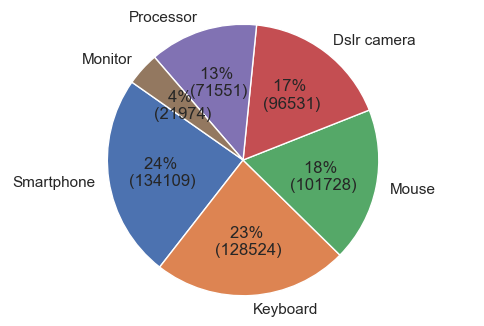

In [28]:
# merged_tables['Product_Type'] = pd.Categorical(merged_tables['Product_Type'],
# categories=['dslr camera', 'keyboard','monitor', 'mouse','processor', 'smartphone'])

prod_type_dict = list(merged_tables.value_counts("Product_Type"))
display(prod_type_dict)

prod_type_sum = pd.DataFrame(merged_tables.Product_Type.value_counts().rename_axis('Product_Category').reset_index())
display(prod_type_sum)

#Make function to display values instead of percentage on pie chart
label=[i for i in prod_type_sum.Product_Category]
label=[i.capitalize() for i in label]

def make_autopct(prod_type):
    def my_autopct(pct):
        total = sum(prod_type)
        val = int(round(pct*total/100.0))
        return '{p:.0f}% \n({v:d})'.format(p=pct,v=val)
    return my_autopct

def func(type_of_product):
  return "{:1.1f}%".format(type_of_product)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = merged_tables["Product_Type"].unique()
sizes = merged_tables.value_counts("Product_Type")
display(sizes)
#explode = (0, .05)  # only "explode" the 2nd slice 
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = label, autopct=make_autopct(prod_type_dict), center = (0,32342343231),
        shadow=False, startangle=145, radius = 100 )
#plt.title("Breakdown of product category")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_aspect('equal', anchor='C')
#ax1.anchor('SE')

plt.show()


In [65]:
testing = pd.DataFrame(merged_tables.groupby("Product_Type")).reset_index().rename({0:"Total_sold"}, axis=1)


,index,Total_sold,1
0,0,dslr camera,InvoiceNo Product_Id Quantity Pric...
1,1,keyboard,InvoiceNo Product_Id Quantity Price ...
2,2,monitor,InvoiceNo Product_Id Quantity Price...
3,3,mouse,InvoiceNo Product_Id Quantity Price ...
4,4,processor,InvoiceNo Product_Id Quantity Pric...
5,5,smartphone,InvoiceNo Product_Id Quantity Price...


In [29]:
sizes = pd.DataFrame(merged_tables.value_counts("Product_Type")).reset_index().rename({0:"Total_sold"}, axis=1)


display(sizes)
display(px.pie(sizes, values='Total_sold', names='Product_Type', hole=.3, title="Units sold per Product type"))

fig = px.bar(sizes, x="Product_Type", y="Total_sold",  title="Units sold per Product type")
fig.show()

,Product_Type,Total_sold
0,smartphone,134109
1,keyboard,128524
2,mouse,101728
3,dslr camera,96531
4,processor,71551
5,monitor,21974


In [30]:
cust_count = merged_tables[merged_tables['Year'] == 2019] 


cust_count = merged_tables[merged_tables['Country'] != "Germany"].groupby(['Customer_Id']).agg({'Country':'unique', 'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                 'Quantity': ['mean', 'sum']}).round(1).reset_index()#.rename(columns={0 : 'count'}).sort_values('count', ascending = False)
cust_count['Total_Orders']=cust_count['InvoiceNo']['nunique']
cust_count['Average_Sale']=cust_count['Total_Sales']['mean']
cust_count['Total_Revenue']=cust_count['Total_Sales']['sum']
cust_count['Country'] = cust_count['Country']['unique']
cust_count['Average_Units_Sold'] = cust_count['Quantity']['mean']
cust_count['Total_Units_Sold'] = cust_count['Quantity']['sum']
cust_count.head()

cust_count = cust_count.sort_values('Total_Orders', ascending = False)
cust_count.drop(418, axis = 0,inplace = True) # drop row where Customer_Id = Null
cust_count = cust_count[['Customer_Id', 'Country', 'Total_Orders', "Average_Sale", 'Total_Revenue',"Average_Units_Sold", 'Total_Units_Sold']]


cust_count.head(10)

,Customer_Id,Country,Total_Orders,Average_Sale,Total_Revenue,Average_Units_Sold,Total_Units_Sold
,,unique,,,,,
395,14911,[Ireland],201,1565.6,9340224.3,14.0,83711
394,14646,[Netherlands],73,9997.6,21664738.3,94.8,205535
387,14156,[Ireland],55,3887.2,5725778.9,41.1,60602
176,12569,[United Kingdom],32,960.2,160355.4,11.4,1911
272,12682,[France],31,938.0,487763.4,11.1,5781
99,12471,[United Kingdom],28,1888.4,885666.3,18.5,8699
303,12720,[United Kingdom],25,1146.9,406008.3,13.6,4819
271,12681,[France],22,962.1,630162.6,12.1,7899
54,12415,[Australia],20,12509.3,9244349.2,108.4,80119


In [31]:
cust_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 395 to 209
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Customer_Id, )         418 non-null    object 
 1   (Country, unique)       418 non-null    object 
 2   (Total_Orders, )        418 non-null    int64  
 3   (Average_Sale, )        418 non-null    float64
 4   (Total_Revenue, )       418 non-null    float64
 5   (Average_Units_Sold, )  418 non-null    float64
 6   (Total_Units_Sold, )    418 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 26.1+ KB


In [32]:
# cust_count = px.bar(sizes, x="Customer_Id", y="Total_Orders",  title="Units sold per Product type")
# fig.show()

In [33]:
# Group by day of week
df_dow = merged_tables[merged_tables['Year'] == 2019].groupby(['Day']).agg({'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)

df_dow['Total_Orders']=df_dow['InvoiceNo']['nunique']
df_dow['Average_Sale']=df_dow['Total_Sales']['mean']
df_dow['Total_Revenue']=df_dow['Total_Sales']['sum']
df_dow['Unique_Customers']= df_dow['Customer_Id']['nunique']
df_dow['Average_Units_Sold'] = df_dow['Quantity']['mean']
df_dow['Total_Units_Sold'] = df_dow['Quantity']['sum']


df_dow = df_dow[['Total_Orders', "Average_Sale", 'Total_Revenue', 'Unique_Customers',"Average_Units_Sold", 'Total_Units_Sold']]
df_dow = df_dow.reset_index()
# Tuesday data is missing, so add zero values.
df_dow.loc['6'] = ["01 Tuesday",0,0,0,0,0,0]

df_dow = df_dow.sort_values(['Day'])
df_dow.index = [0,1,2,3,4,5,6]
df_dow = df_dow[['Day', 'Total_Orders', "Average_Sale", 'Total_Revenue', 'Unique_Customers',"Average_Units_Sold", 'Total_Units_Sold']]
display(df_dow["Total_Orders"].sum())
df_dow

18962

,Day,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold
,,,,,,,
0,00 Monday,3047,1166.2,88330069.7,1497,12.0,906148
1,01 Tuesday,0,0.0,0.0,0,0.0,0
2,02 Wednesday,2052,784.5,48485380.6,1181,7.4,459617
3,03 Thursday,2993,1004.4,89819435.1,1525,10.0,894923
4,04 Friday,3430,1174.9,114301948.9,1649,11.9,1154448
5,05 Saturday,3477,1181.5,105295667.4,1652,11.6,1034159
6,06 Sunday,3963,1320.6,129034351.3,1901,12.3,1200525


In [34]:
# Group by Hour
df_Hour = merged_tables[merged_tables['Year'] == 2019].groupby(['Hour']).agg({'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)
df_Hour['Total_Orders']=df_Hour['InvoiceNo']['nunique']
df_Hour['Average_Sale']=df_Hour['Total_Sales']['mean']
df_Hour['Total_Revenue']=df_Hour['Total_Sales']['sum']
df_Hour['Unique_Customers']= df_Hour['Customer_Id']['nunique']
df_Hour['Average_Units_Sold'] = df_Hour['Quantity']['mean']
df_Hour['Total_Units_Sold'] = df_Hour['Quantity']['sum']

df_Hour = df_Hour[['Total_Orders', 'Average_Sale', 'Total_Revenue', 'Unique_Customers', 'Average_Units_Sold', 'Total_Units_Sold']]
df_Hour = df_Hour.reset_index()
df_Hour.head(3)

,Hour,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold
,,,,,,,
0,6,1,279.0,279.0,1,1.0,1
1,7,27,3657.5,1411814.1,26,40.9,15773
2,8,540,1899.8,16959489.2,415,18.2,162761


In [35]:
# Group by Month
df_Month = merged_tables[merged_tables['Year'] == 2019].groupby(['Month']).agg({'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)
df_Month['Total_Orders']=df_Month['InvoiceNo']['nunique']
df_Month['Average_Sale']=df_Month['Total_Sales']['mean']
df_Month['Total_Revenue']=df_Month['Total_Sales']['sum']
df_Month['Unique_Customers']= df_Month['Customer_Id']['nunique']
df_Month['Average_Units_Sold'] = df_Month['Quantity']['mean']
df_Month['Total_Units_Sold'] = df_Month['Quantity']['sum']

df_Month = df_Month[['Total_Orders', 'Average_Sale', 'Total_Revenue', 'Unique_Customers', 'Average_Units_Sold', 'Total_Units_Sold']].sort_values("Month")
df_Month = df_Month.reset_index()
df_Month.head(2)

,Month,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold
,,,,,,,
0,01 January,1100,1063.1,38126912.3,742,11.4,407747
1,02 February,1108,1032.9,29315803.0,759,10.6,300844


In [36]:
# Group by Invoice_Date
df_date = merged_tables[merged_tables['Year'] == 2019].groupby(['Invoice_Date']).agg({'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)
df_date['Total_Orders']=df_date['InvoiceNo']['nunique']
df_date['Average_Sale']=df_date['Total_Sales']['mean']
df_date['Total_Revenue']=df_date['Total_Sales']['sum']
df_date['Unique_Customers']= df_date['Customer_Id']['nunique']
df_date['Average_Units_Sold'] = df_date['Quantity']['mean']
df_date['Total_Units_Sold'] = df_date['Quantity']['sum']

df_date = df_date[['Total_Orders', 'Average_Sale', 'Total_Revenue', 'Unique_Customers', 'Average_Units_Sold', 'Total_Units_Sold']]
df_date = df_date.reset_index()
df_date.head(2)

,Invoice_Date,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold
,,,,,,,
0,2019-01-04,39,830.3,1002201.6,35,7.7,9256
1,2019-01-05,55,1023.9,1786655.0,46,11.8,20504


In [37]:
# Group by Country
df_country = merged_tables[merged_tables['Year'] == 2019].groupby(['Country']).agg({'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)
df_country['Total_Orders']=df_country['InvoiceNo']['nunique']
df_country['Average_Sale']=df_country['Total_Sales']['mean']
df_country['Total_Revenue']=df_country['Total_Sales']['sum']
df_country['Unique_Customers']= df_country['Customer_Id']['nunique']
df_country['Average_Units_Sold'] = df_country['Quantity']['mean']
df_country['Total_Units_Sold'] = df_country['Quantity']['sum']

df_country = df_country[['Total_Orders', 'Average_Sale', 'Total_Revenue', 'Unique_Customers', 'Average_Units_Sold', 'Total_Units_Sold']]
df_country.sort_values(by = ['Total_Revenue', 'Total_Orders', 'Unique_Customers'],ascending = False, inplace = True)
#df_country['revenue_per_customer'] = df_country['Total_Revenue'] / df_country['Unique_Customers']
df_country['Average_Order_Value'] = (df_country['Total_Revenue'] / df_country['Total_Orders']).round(1)
df_country = df_country.reset_index()
df_country.head(2)

,Country,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold,Average_Order_Value
,,,,,,,,
0,Germany,17167,1028.9,480882971.2,3815,10.1,4731881,28012.1
1,Netherlands,91,8969.7,21302953.4,8,85.1,202159,234098.4


In [38]:
# Group by customer

df_customer = merged_tables.groupby(['Customer_Id']).agg({'InvoiceNo':'nunique', 'Total_Sales':'sum', 
                                                    'Product_Id': 'nunique', 'Price':'mean',
                                                     'Quantity': ['mean', 'sum']}).round(1)

df_customer['Total_Orders'] = df_customer['InvoiceNo']['nunique']
df_customer['Total_Revenue'] = df_customer['Total_Sales']['sum']
df_customer['Unique_Products'] = df_customer['Product_Id']['nunique']
df_customer['Average_Unit_Price'] = df_customer['Price']['mean']
df_customer['Total_Units_Sold'] = df_customer['Quantity']['sum']


df_customer = df_customer[['Total_Orders','Total_Revenue','Unique_Products','Average_Unit_Price','Total_Units_Sold']].reset_index().sort_values(by='Total_Revenue',ascending=False)
df_customer.drop(4339, axis = 0,inplace = True) # drop row where Customer_Id = Null
df_customer.columns = [tup[0] for tup in df_customer.columns]
df_customer.columns
# We also want to add the customer Country to df_customer. Do a left join.
dummy = merged_tables[['Customer_Id', 'Country']].drop_duplicates()
df_customer = pd.merge(df_customer, dummy, on = 'Customer_Id', how = 'left', copy = False)
df_customer.head(2)

,Customer_Id,Total_Orders,Total_Revenue,Unique_Products,Average_Unit_Price,Total_Units_Sold,Country
0,14646,73,21664738.3,707,96.9,205535,Netherlands
1,14911,201,9340224.3,1790,97.5,83711,Ireland


In [39]:
# Group by day of week
df_month_week = merged_tables[merged_tables['Year'] == 2019].groupby(['Month','Day']).agg({'InvoiceNo':'nunique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)

df_month_week['Total_Orders']=df_month_week['InvoiceNo']['nunique']
df_month_week['Average_Sale']=df_month_week['Total_Sales']['mean']
df_month_week['Total_Revenue']=df_month_week['Total_Sales']['sum']
df_month_week['Unique_Customers']= df_month_week['Customer_Id']['nunique']
df_month_week['Average_Units_Sold'] = df_month_week['Quantity']['mean']
df_month_week['Total_Units_Sold'] = df_month_week['Quantity']['sum']


df_month_week = df_month_week[['Total_Orders', "Average_Sale", 'Total_Revenue', 'Unique_Customers',"Average_Units_Sold", 'Total_Units_Sold']]
df_month_week = df_month_week.reset_index()
# Tuesday data is missing, so add zero values.
#df_month_week.loc['6'] = ["01 Tuesday",0,0,0,0,0,0]

df_month_week = df_month_week.sort_values(['Month','Day'])
#df_month_week.index = [0,1,2,3,4,5,6]
df_month_week = df_month_week[['Day', 'Month', 'Total_Orders', "Average_Sale", 'Total_Revenue', 'Unique_Customers',"Average_Units_Sold", 'Total_Units_Sold']]
display(df_month_week["Total_Orders"].sum())
df_month_week

18962

,Day,Month,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold
,,,,,,,,
0,00 Monday,01 January,179,1225.3,7236550.8,144,11.5,67892
1,02 Wednesday,01 January,124,656.4,2267133.8,108,6.4,22086
2,03 Thursday,01 January,213,699.3,5458648.4,163,7.5,58704
3,04 Friday,01 January,204,2011.0,11728432.2,162,23.7,138023
4,05 Saturday,01 January,193,912.9,5839731.0,153,9.6,61727
...,...,...,...,...,...,...,...,...
67,02 Wednesday,12 December,68,592.3,1249856.7,59,6.0,12744
68,03 Thursday,12 December,132,799.3,4406557.6,106,8.4,46490
69,04 Friday,12 December,116,1019.2,3438948.4,104,9.5,31926


In [41]:

display(px.pie(df_dow, values='Total_Orders', names='Day', hole=.3, title="Number of unique orders by weekday"))
display(px.pie(df_dow, values='Average_Sale', names='Day', hole=.3, title="Average sale per weekday"))


In [42]:
display(df_country.sort_values(by='Total_Orders', ascending=False))
df_top5_Count = df_country.sort_values(by='Total_Orders', ascending=False).reset_index(drop=True)
df_top5_Count = df_top5_Count[1:6]
df_top5_Count

# "Total_Orders", "Total_Revenue", "Unique_Customers", "Total_Units_Sold", "Average_Order_Value"

,Country,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold,Average_Order_Value
,,,,,,,,
0,Germany,17167,1028.9,480882971.2,3815,10.1,4731881,28012.1
3,United Kingdom,445,1267.5,11787916.0,101,13.6,126310,26489.7
4,France,366,1376.4,11095393.0,85,13.8,111131,30315.3
2,Ireland,271,1947.0,15390867.6,4,18.7,147902,56792.9
10,Belgium,93,1192.5,2280107.1,25,11.5,21917,24517.3
1,Netherlands,91,8969.7,21302953.4,8,85.1,202159,234098.4
9,Spain,84,1087.4,2691363.7,29,11.8,29128,32040.0
5,Australia,53,8156.6,9804245.9,9,72.0,86520,184985.8
11,Portugal,50,1115.5,1622999.0,18,11.2,16270,32460.0


,Country,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold,Average_Order_Value
,,,,,,,,
1,United Kingdom,445,1267.5,11787916.0,101,13.6,126310,26489.7
2,France,366,1376.4,11095393.0,85,13.8,111131,30315.3
3,Ireland,271,1947.0,15390867.6,4,18.7,147902,56792.9
4,Belgium,93,1192.5,2280107.1,25,11.5,21917,24517.3
5,Netherlands,91,8969.7,21302953.4,8,85.1,202159,234098.4


<AxesSubplot:xlabel='Country', ylabel='Total_Orders'>

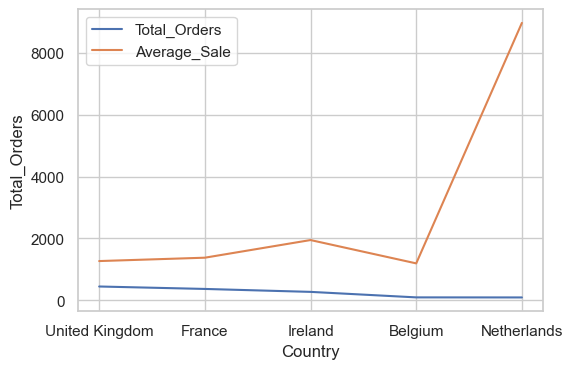

In [43]:
sns.lineplot(x="Country", y="Total_Orders",data=df_top5_Count, label="Total_Orders")
sns.lineplot(x="Country", y="Average_Sale",data=df_top5_Count, label="Average_Sale")



In [44]:
fig = px.sunburst(df_country, path=["Total_Orders", "Total_Revenue", "Unique_Customers", "Total_Units_Sold", "Average_Order_Value"], values='Total_Orders',
                  color='Country', hover_data=['Total_Orders'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_country['Total_Orders'], weights=df_country['Unique_Customers']))
fig.show()

fig = px.sunburst(df_country, path=['Country', 'Total_Orders', 'Total_Revenue'])
fig.show()

In [45]:
display("Unique number of Country in merged: " + str(merged_tables.Country.unique()))

display("Unique number of Country in coutnry: " + str(df_country.Country.unique()))
display("Unique number of Country: " + str(merged_tables.Country.nunique()) == str(df_country.Country.unique()))

new_df = pd.merge(df_country, merged_tables, on='Country', how='outer')

merged_tables.loc[~merged_tables['Country'].isin(df_country['Country']), 'Country']


x = str(merged_tables.Country.nunique()) == str(df_country.Country.unique())
#print(df_country['Country'].isin(merged_tables['Country']))

original = pd.DataFrame(merged_tables.Country.unique())
original.info()

display("Unique number of Country:")
new = pd.DataFrame(df_country.Country.unique())
new.info()

#original['0'] = np.where(original['0'] == new['0'], 'True', 'False')




"Unique number of Country in merged: ['Germany' 'Ireland' 'Norway' 'Australia' 'France' 'United Kingdom'\n 'Netherlands' 'Italy' 'Portugal' 'Poland' 'Switzerland' 'Belgium' 'Spain'\n 'Japan' 'Lithuania' 'Iceland' 'Denmark' 'Cyprus' 'Sweden' 'Finland'\n 'Austria' 'Bahrain' 'Israel' 'Hong Kong' 'Greece' 'Singapore' 'Lebanon'\n 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Unknown'\n 'Brazil' 'United States' 'European Community' 'Malta' 'South Africa']"

"Unique number of Country in coutnry: ['Germany' 'Netherlands' 'Ireland' 'United Kingdom' 'France' 'Australia'\n 'Sweden' 'Japan' 'Switzerland' 'Spain' 'Belgium' 'Portugal' 'Norway'\n 'Finland' 'Italy' 'Cyprus' 'Singapore' 'Denmark' 'Israel' 'Austria'\n 'Hong Kong' 'Poland' 'Unknown' 'United States' 'Canada' 'Iceland'\n 'Greece' 'Malta' 'Czech Republic' 'United Arab Emirates'\n 'European Community' 'Brazil' 'Lebanon' 'South Africa' 'Bahrain'\n 'Saudi Arabia']"

False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       37 non-null     object
dtypes: object(1)
memory usage: 424.0+ bytes


'Unique number of Country:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       36 non-null     object
dtypes: object(1)
memory usage: 416.0+ bytes


In [46]:
merged_tables.loc[~merged_tables['Country'].isin(df_country['Country']), 'Country']


7967     Lithuania
7968     Lithuania
7969     Lithuania
7970     Lithuania
7971     Lithuania
7972     Lithuania
8602     Lithuania
8603     Lithuania
8604     Lithuania
8605     Lithuania
8606     Lithuania
8607     Lithuania
8608     Lithuania
8609     Lithuania
8832     Lithuania
9215     Lithuania
9216     Lithuania
9217     Lithuania
9218     Lithuania
9219     Lithuania
9220     Lithuania
9221     Lithuania
9222     Lithuania
9630     Lithuania
9631     Lithuania
9632     Lithuania
9633     Lithuania
9634     Lithuania
9635     Lithuania
10237    Lithuania
10238    Lithuania
10239    Lithuania
10240    Lithuania
10241    Lithuania
10242    Lithuania
10243    Lithuania
19602    Lithuania
Name: Country, dtype: object

In [47]:


#del df_country

In [48]:
check =merged_tables[merged_tables['Country'] == "Lithuania"].agg({'InvoiceNo':'unique', 'Total_Sales':['mean', 'sum'], 
                                                'Customer_Id':'nunique', 'Quantity': ['mean', 'sum']}).round(1)
display(check)

check['num_orders']=check['InvoiceNo']['unique']
check['total_sale_mean']=check['Total_Sales']['mean']
check['total_sale']=check['Total_Sales']['sum']
check['num_unique_customers']=check['Customer_Id']['nunique']
check['Quantity_mean']=check['Quantity']['mean']
check['Quantity_sum']=check['Quantity']['sum']
display(check)

# check = check[['num_orders', 'total_sale_mean', 'total_sale', 'num_unique_customers','Quantity_mean','Quantity_sum']].round(1)
# check.sort_values(by = ['num_orders', 'total_revenue', 'num_unique_customers','total_sale_mean'],ascending = False, inplace = True)
# display(check)
# df_country['num_orders']=df_country['InvoiceNo']['nunique']
# df_country['total_sale_mean']=df_country['Total_Sales']['mean']
# df_country['total_revenue']=df_country['Total_Sales']['sum']
# df_country['median']=df_country['Total_Sales']['median']
# df_country['num_unique_customers']= df_country['Customer_Id']['nunique']
# df_country['units_sold_mean'] = df_country['Quantity']['mean']
# df_country['total_units_sold'] = df_country['Quantity']['sum']
# 
# df_country = df_country[['num_orders', 'total_revenue', 'num_unique_customers', 'total_units_sold','total_sale_mean','median']].round(1)
# df_country.sort_values(by = ['num_orders', 'total_revenue', 'num_unique_customers','total_sale_mean'],ascending = False, inplace = True)
# df_country['revenue_per_customer'] = (df_country['total_revenue'] / df_country['num_unique_customers']).round(1)
# df_country['revenue_per_order'] = (df_country['total_revenue'] / df_country['num_orders']).round(1)
# df_country = df_country.reset_index()



,InvoiceNo,Total_Sales,Customer_Id,Quantity
unique,"[78537086, 78537081, 78537090, 78537827]",NaN,NaN,NaN
mean,NaN,1660.8,NaN,18.3
sum,NaN,61451.1,NaN,676.0
nunique,NaN,NaN,1.0,NaN


,InvoiceNo,Total_Sales,Customer_Id,Quantity,num_orders,total_sale_mean,total_sale,num_unique_customers,Quantity_mean,Quantity_sum
unique,"[78537086, 78537081, 78537090, 78537827]",NaN,NaN,NaN,78537086,1660.8,61451.1,1.0,18.3,676.0
mean,NaN,1660.8,NaN,18.3,78537081,1660.8,61451.1,1.0,18.3,676.0
sum,NaN,61451.1,NaN,676.0,78537090,1660.8,61451.1,1.0,18.3,676.0
nunique,NaN,NaN,1.0,NaN,78537827,1660.8,61451.1,1.0,18.3,676.0


In [49]:
df_dow.head(1)

,Day,Total_Orders,Average_Sale,Total_Revenue,Unique_Customers,Average_Units_Sold,Total_Units_Sold
,,,,,,,
0,00 Monday,3047,1166.2,88330069.7,1497,12.0,906148


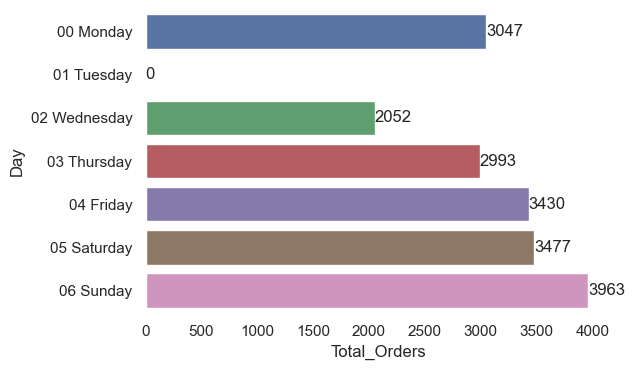

In [50]:
# Total orders per day
ax = sns.barplot(data=df_dow, x="Total_Orders", y="Day", orient="h")
ax.bar_label(ax.containers[0])
ax.grid(False)
sns.despine(bottom = True, left = True)
plt.show()



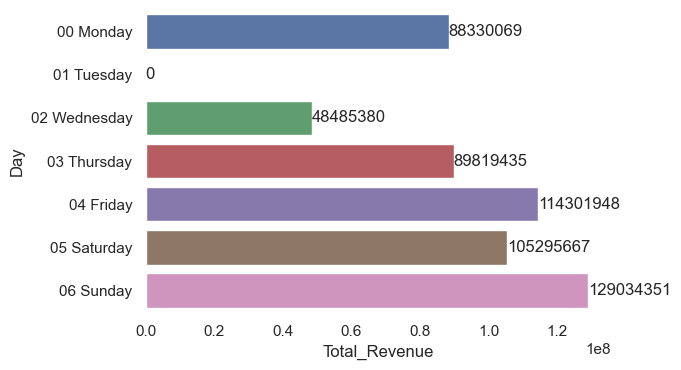

In [51]:
# Revenue per day
ax = sns.barplot(data=df_dow, x=df_dow["Total_Revenue"].round(1), y="Day", orient="h")
ax.bar_label(ax.containers[0], fmt = '%d')
ax.grid(False)
sns.despine(bottom = True, left = True)
plt.show()



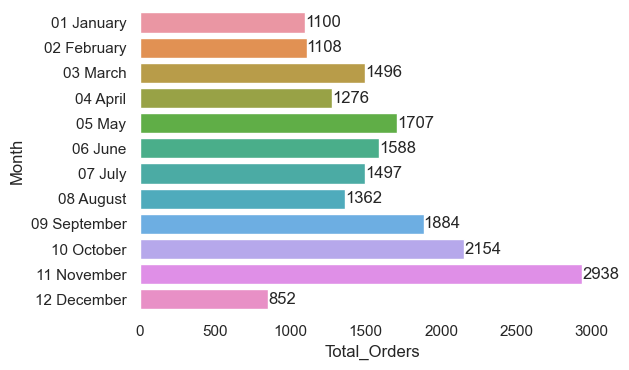

In [52]:
# Total orders per Month
ax = sns.barplot(data=df_Month, x="Total_Orders", y="Month", orient="h")
ax.bar_label(ax.containers[0])
ax.grid(False)
sns.despine(bottom = True, left = True)
plt.show()

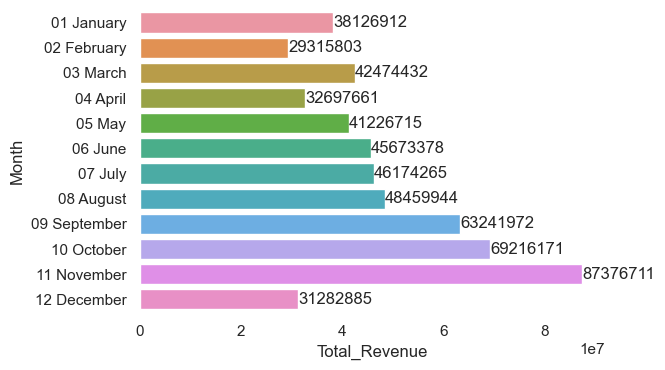

In [53]:
# Revenue per Month
ax = sns.barplot(data=df_Month, x=df_Month["Total_Revenue"].round(1), y="Month", orient="h")
ax.bar_label(ax.containers[0], fmt = '%d')
ax.grid(False)
sns.despine(bottom = True, left = True)
plt.show()



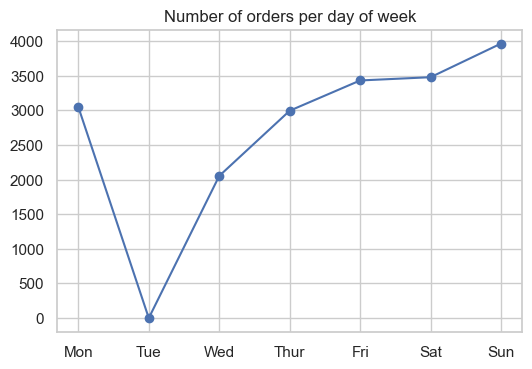

In [54]:
fig, ax = plt.subplots()
ax.plot(df_dow['Day'], df_dow['Total_Orders'], marker = 'o')
ax.set_title('Number of orders per day of week')
ax.set_xticks(list(range(7)))
ax.set_xticklabels(labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

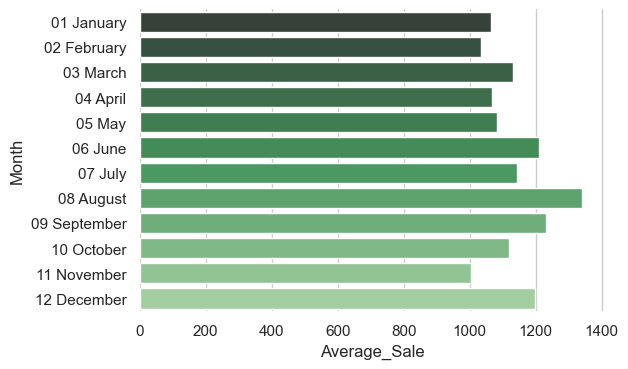

In [55]:


# Total orders per day
sns.set(style="whitegrid", color_codes=True)
data = df_Month["Average_Sale"]
pal = sns.color_palette("Greens_d", len(data))
sns.barplot(data=df_Month, x="Average_Sale", y="Month", orient="h", palette=np.array(pal[::-1]))

# ax.bar_label(ax.containers[0])
# ax.grid(False)
sns.despine(bottom = True, left = True)

plt.show()

IndexError: list index out of range

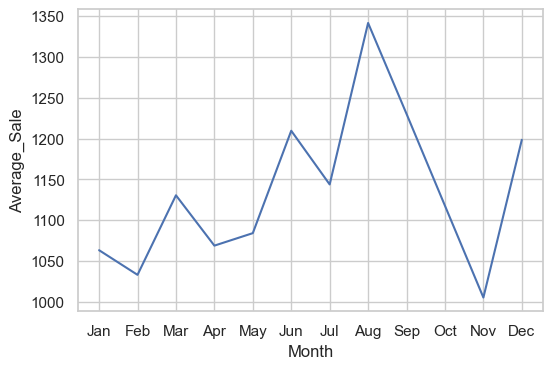

In [56]:
g= sns.lineplot(x = "Month", y = "Average_Sale", data=df_Month)
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.bar_label(ax.containers[0])
ax.grid(False)
sns.despine(bottom = True, left = True)
plt.show()


In [57]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554417 entries, 0 to 554416
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     554417 non-null  object        
 1   Product_Id    554417 non-null  object        
 2   Quantity      554417 non-null  int64         
 3   Price         554417 non-null  float64       
 4   Total_Sales   554417 non-null  float64       
 5   Customer_Id   554417 non-null  object        
 6   Product_Name  554417 non-null  object        
 7   Product_Type  554417 non-null  object        
 8   Country       554417 non-null  object        
 9   Rating        554417 non-null  float64       
 10  Review_Count  554417 non-null  int64         
 11  StockCode     554417 non-null  object        
 12  Hour          554417 non-null  int64         
 13  Day           554417 non-null  object        
 14  Month         554417 non-null  object        
 15  Year          554

In [58]:
customer_info = merged_tables.groupby('Customer_Id').agg({'InvoiceNo':'nunique', 'Total_Sales':'sum', 'Product_Id':'nunique'}).reset_index().sort_values(by = 'Total_Sales', ascending = False)
customer_info['Revenue_Order'] = customer_info['Total_Sales'] / customer_info['InvoiceNo']
customer_info[customer_info['InvoiceNo']==1]
display(customer_info.info())
customer_country = merged_tables[['Customer_Id','Country']].drop_duplicates()
customer_info = pd.merge(customer_info, customer_country, how = 'left', on = 'Customer_Id')
customer_info = customer_info[customer_info['Customer_Id']!= 'Null']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 4339 to 825
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Id    4340 non-null   object 
 1   InvoiceNo      4340 non-null   int64  
 2   Total_Sales    4340 non-null   float64
 3   Product_Id     4340 non-null   int64  
 4   Revenue_Order  4340 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 203.4+ KB


None

In [59]:
one_time = customer_info[customer_info['InvoiceNo']==1]['Total_Sales'].sum()
repeat = customer_info[(customer_info['InvoiceNo']>1) & (customer_info['Customer_Id']!= 'Null')]['Total_Sales'].sum()
anon = customer_info[customer_info['Customer_Id'] == 'Null']['Total_Sales'].sum()
print(f'one-time buyers: {one_time/1000000} M euros \n repeat customers: {repeat/1000000} M euros \n anon buyers: {anon/1000000} M euros')

one-time buyers: 40.06299496000001 M euros 
 repeat customers: 515.33243304 M euros 
 anon buyers: 0.0 M euros


In [60]:
rev_per_customer_type = pd.DataFrame({'total_revenue (M EUR)': [round(one_time/1000000,2),round(repeat/1000000,2), round(anon/1000000,2)]}, index = ['one-time buyers', 'repeat customers', 'anon. buyers']).reset_index().rename(columns = {'index':'customer_type'})
rev_per_customer_type

,customer_type,total_revenue (M EUR)
0,one-time buyers,40.06
1,repeat customers,515.33
2,anon. buyers,0.00
